# Estimation of tax expenditures

Tax expenditures also known as tax incentives, taxbenets, tax reliefs or spending through the tax code as exemptions, reduced rates, deductions, tax credits that reduce the tax payer's liability etc.

Thie Notebook show ploting of synthetic data with Pareto plots

In [13]:
options(warn=-1)
library(tidyverse)
library(ggQC)
library(data.table)
options(scipen = 999) # switch off scientific notation

In [23]:
# Creating syntetic data
TE_TABLE<-data.frame(
    group=rep(c("Direct taxes","Indirect taxes","Customs duties","SSC"), each = 59,times=4),
    NAME=rep(c("Products of agriculture, hunting and related services",                                                                                              
           "Products of forestry, logging and related services",                                                                                                 
           "Fish and other fishing products; aquaculture products; support services to fishing",                                                                 
           "Mining and quarrying",                                                                                                                               
           "Food products, beverages and tobacco products",                                                                                                      
           "Textiles, wearing apparel and leather products",                                                                                                     
           "Wood and products of wood and cork (except furniture); articles of straw and plaiting materials",                                                    
           "Paper and paper products",                                                                                                                           
           "Printing and recording services",                                                                                                                    
           "Coke and refined petroleum products",                                                                                                               
           "Chemicals and chemical products",                                                                                                                    
           "Basic pharmaceutical products and pharmaceutical preparations",                                                                                      
           "Rubber and plastic products",                                                                                                                        
           "Other non-metallic mineral products",                                                                                                                
           "Basic metals",                                                                                                                                       
           "Fabricated metal products, except machinery and equipment",                                                                                          
           "Computer, electronic and optical products",                                                                                                          
           "Electrical equipment",                                                                                                                               
           "Machinery and equipment n.e.c",                                                                                                                      
           "Motor vehicles, trailers and semi-trailers",                                                                                                         
           "Other transport equipment",                                                                                                                          
           "Furniture; other manufactured goods",                                                                                                                
           "Repair and installation services of machinery and equipment",                                                                                        
           "Electricity, gas, steam and air-conditioning",                                                                                                       
           "Constructions and construction works",                                                                                                               
           "Wholesale and retail trade and repair services of motor vehicles and motorcycles",                                                                   
           "Wholesale trade services, except of motor vehicles and motorcycles",                                                                                 
           "Retail trade services, except of motor vehicles and motorcycles",                                                                                    
           "Land transport services and transport services via pipelines",                                                                                       
           "Water transport services",                                                                                                                           
           "Warehousing and support services for transportation",                                                                                                
           "Postal and courier services",                                                                                                                        
           "Accommodation and food services",                                                                                                                    
           "Publishing services",                                                                                                                                
           "Motion picture, video and television programme production services, sound recording and music publishing; programming and broadcasting services",    
           "Telecommunications services",                                                                                                                        
           "Computer programming, consultancy and related services; information services",                                                                       
           "Financial services, except insurance and pension funding",                                                                                           
           "Services auxiliary to financial services and insurance services",                                                                                    
           "Real estate services (excluding imputed rent)",                                                                                                      
           "Legal and accounting services; services of head offices; management consulting services",                                                            
           "Architectural and engineering services; technical testing and analysis services",                                                                    
           "Advertising and market research services",                                                                                                           
           "Other professional, scientific and technical services; veterinary services",                                                                         
           "Rental and leasing services",                                                                                                                        
           "Travel agency, tour operator and other reservation services and related services",                                                                   
           "Security and investigation services; services to buildings and landscape; office administrative, office support and other business support services",
           "Education services",                                                                                                                                 
           "Human health services",                                                                                                                              
           "Social work services",                                                                                                                               
           "Creative, arts and entertainment services; library, archive, museum and other cultural services; gambling and betting services",                     
           "Sporting services and amusement and recreation services",                                                                                            
           "Services furnished by membership organisations",                                                                                                     
           "Repair services of computers and personal and household goods",                                                                                      
           "Other personal services",                                                                                                                            
           "Services of households as employers; undifferentiated goods and services produced by households for own use",                                                                                                                                                                                           
           "Natural water; water treatment and supply services",                                                                                                 
           "Insurance, reinsurance and pension funding services, except compulsory social security",                                                             
           "Air transport services"), times=4),
    individual= rep(c("01","02","03","B","10-12","13-15","16","17","18","19","20","21",   
            "22","23","24","25","26","27","28","29","30","31-32","33","35","F","45","46","47",
            "49","50","52","53","I","58","59-60","61","62-63","64","66","68B","69-70","71","73",
            "74-75","77","79","80-82","85","86","87-88","90-92","93","94","95","96","T","36","65","51"),times=4),
    value=rep(sample(seq(from = 1, to = 500), size = 59, replace = TRUE),times=4),
    #value=rep(sample(as.integer(runif(10000, 1, 944)),times=4)),
    Id=seq(1,944)
)

In [24]:
head(TE_TABLE)

group,NAME,individual,value,Id
Direct taxes,"Products of agriculture, hunting and related services",01,93,1
Direct taxes,"Products of forestry, logging and related services",02,104,2
Direct taxes,Fish and other fishing products; aquaculture products; support services to fishing,03,447,3
Direct taxes,Mining and quarrying,B,18,4
Direct taxes,"Food products, beverages and tobacco products",10-12,108,5
Direct taxes,"Textiles, wearing apparel and leather products",13-15,329,6


# 1. Direct taxes

In [25]:
TE_TABLE_GROUP<-TE_TABLE%>%
dplyr::filter(group=="Direct taxes")%>%
dplyr::select(individual,value)%>%
dplyr::group_by(individual)%>%
dplyr::summarise(value=sum(value))%>%
dplyr::top_n(10)

Selecting by value


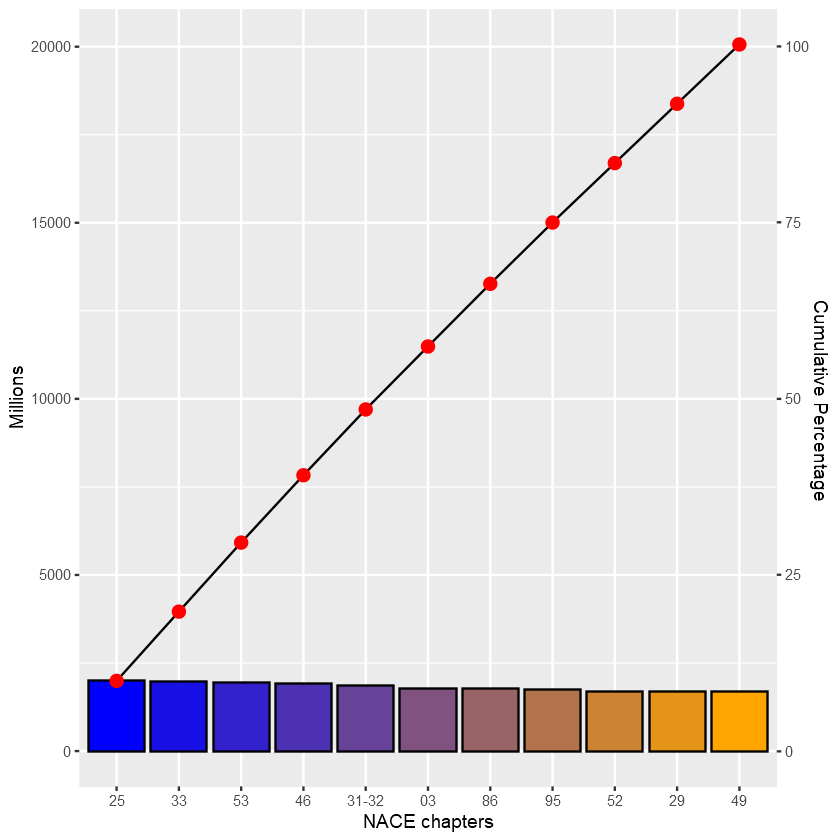

In [26]:
ggplot(TE_TABLE_GROUP, aes(x=individual, y=value)) +
  stat_pareto(point.color = "red",
              point.size = 3,
              line.color = "black",
              size.line = 1,
              bars.fill = c("blue", "orange")
  )+
  xlab('NACE chapters') +
  ylab('Millions')

# 2. Indirect taxes

In [17]:
TE_TABLE_GROUP<-TE_TABLE%>%
dplyr::filter(group=="Indirect taxes")%>%
dplyr::select(individual,value)%>%
dplyr::group_by(individual)%>%
dplyr::summarise(value=sum(value))%>%
dplyr::top_n(10)

Selecting by value


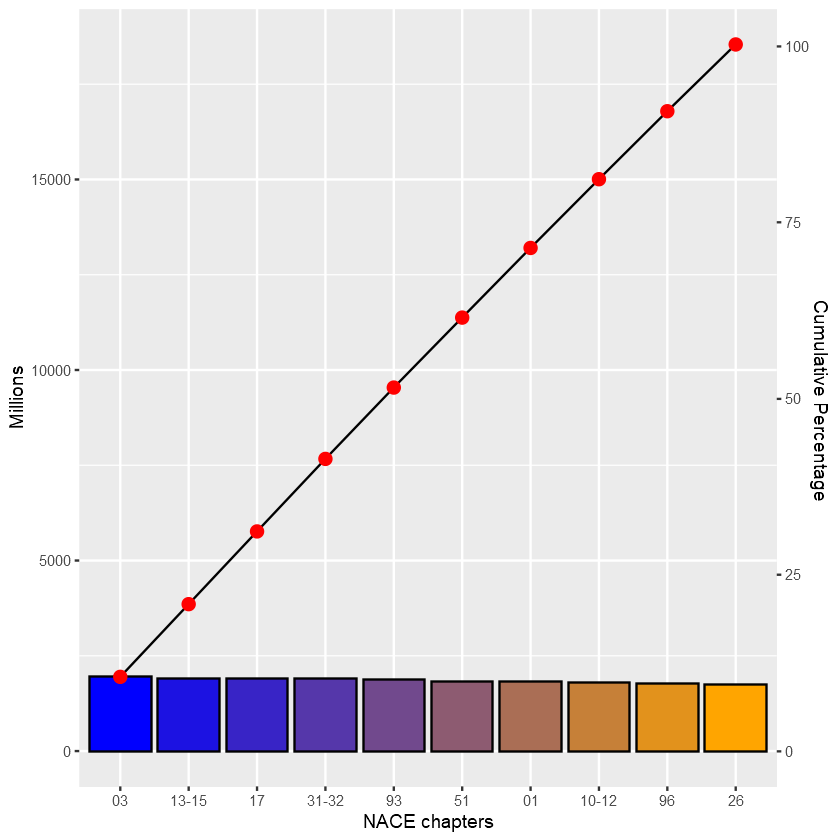

In [18]:
ggplot(TE_TABLE_GROUP, aes(x=individual, y=value)) +
  stat_pareto(point.color = "red",
              point.size = 3,
              line.color = "black",
              size.line = 1,
              bars.fill = c("blue", "orange")
  )+
  xlab('NACE chapters') +
  ylab('Millions')

# 3. Customs duties

In [27]:
TE_TABLE_GROUP<-TE_TABLE%>%
dplyr::filter(group=="Customs duties")%>%
dplyr::select(individual,value)%>%
dplyr::group_by(individual)%>%
dplyr::summarise(value=sum(value))%>%
dplyr::top_n(10)

Selecting by value


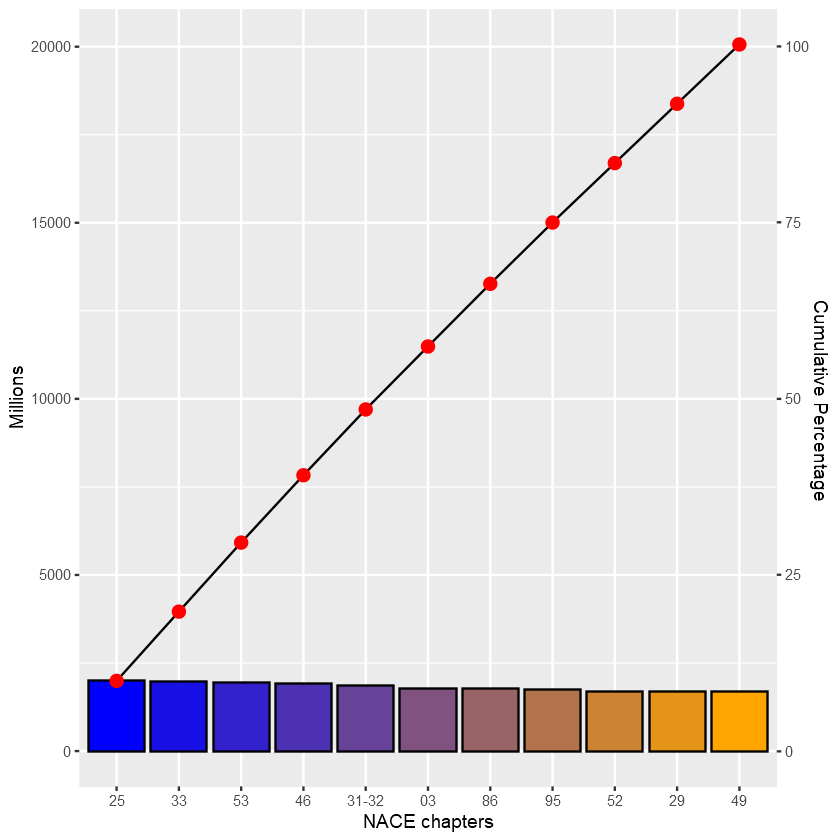

In [28]:
ggplot(TE_TABLE_GROUP, aes(x=individual, y=value)) +
  stat_pareto(point.color = "red",
              point.size = 3,
              line.color = "black",
              size.line = 1,
              bars.fill = c("blue", "orange")
  )+
  xlab('NACE chapters') +
  ylab('Millions')

# 4. SSC

In [21]:
TE_TABLE_GROUP<-TE_TABLE%>%
dplyr::filter(group=="SSC")%>%
dplyr::select(individual,value)%>%
dplyr::group_by(individual)%>%
dplyr::summarise(value=sum(value))%>%
dplyr::top_n(10)

Selecting by value


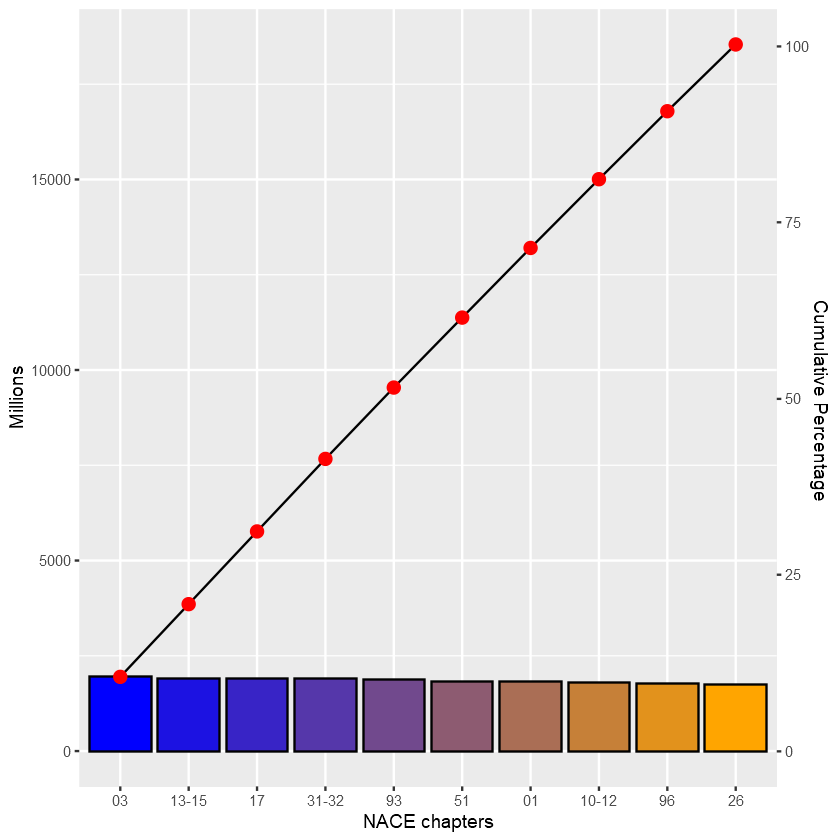

In [22]:
ggplot(TE_TABLE_GROUP, aes(x=individual, y=value)) +
  stat_pareto(point.color = "red",
              point.size = 3,
              line.color = "black",
              size.line = 1,
              bars.fill = c("blue", "orange")
  )+
  xlab('NACE chapters') +
  ylab('Millions')